# Review of classical electronic structure methods 

In order to assess the performance of quantum computing algorithms in addressing the electronic structure problem, we will briefly review a few commonly employed classical electronic structure methods of varying level of approximation. 

## Hartree-Fock

The Hartree-Fock (HF) method employs a **mean-field approximation**, where Coulomb correlation of electrons is neglected. The HF wavefunction is hence restricted to the form of a single Slater determinant, for which the optimal form may be acquired by an optimization of the underlying single particle basis (orbitals). Once the optimal HF orbitals have been found, the HF state may be written as 

$$ | \text{HF} \rangle = \prod_{p \in \text{occ}} \hat a^\dagger_p | \text{vac} \rangle $$

where $\hat a^\dagger_p$ creates an electron in the $p^{\rm{th}}$ optimized HF spin orbital, and  $| \text{vac} \rangle$ is the vacuum state (all spin-orbitals unoccupied). Due to the restriction to a single Slater determinant, the HF energy may be obtained very efficiently and can be applied to very large molecules, however it becomes qualitatively incorrect when **electronic correlations** become sufficiently strong. The HF wavefunction is often used as a starting point in more accurate treatments of electronic correlation. 

## Coupled cluster

The Coupled cluster (CC) method introduces electronic correlation to the wavefunction ansatz by operating on the HF reference state with the exponential of excitation operators

$$|\text{CC} \rangle = e^{\hat T} | \text{HF}\rangle, \quad \hat T = \hat T_1 + \hat T_2 + ...$$

where $\hat T_1 = \sum_{ia} t^{a}_i \hat a^\dagger_a \hat a_i$ are referred to as 'singles', $\hat T_2 = \sum_{ijab} t^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j$ as 'doubles', etc. When the excitation rank is truncated to only singles (S) and doubles (D), $\hat T = \hat T_1 + \hat T_2$, the corresponding ansatz is referred to as CCSD. Since the number of possible single and double excitations for a system of $N$ electrons in $M$ orbitals is polynomial in $M$, one can efficiently solve a system of equations to obtain the optimized CCSD amplitudes. CCSD often gives accurate energies and can be applied to modestly sized chemical systems. However, due to its implementation, it can **violate the variational principle** and give energies lower than the ground state.

## Full Configuration Interaction
The full configuration interaction (FCI) method yields the **exact ground state energy** within a given basis set. The FCI wavefunction is written as a linear combination of all possible $N$-particle Slater determinants over the orbital basis
$$|\text{FCI} \rangle =  \left( \sum_{ia} C^{a}_i \hat a^\dagger_a \hat a_i + \sum_{ijab} C^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j + ...  \right) | \text{HF} \rangle $$
where the sum includes up to $N$-electron excitations, and hence there are an exponential number of coefficients to optimize in $| \text{FCI} \rangle$. Due to its **exponential complexity**, FCI is often reserved for only the smallest chemical systems. However, it serves as a useful result to compare to when assessing tractable electronic structure methods.

# Benchmarking for electronic PESs in minimal basis (STO-3G)

We will apply HF, CCSD, and FCI to obtaining the PESs for a few molecular dissociation processes in minimal (STO-3G) basis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utility import get_molecular_data, obtain_PES

basis = 'sto-3g'

## Task 1 (b)

In [2]:
from tequila import QubitHamiltonian, Variable, quantumchemistry, gates, PauliString, minimize

In [5]:
from timeit import default_timer as timer

In [30]:
# try another basis
basis = 'sto-3g'
# basis = 'cc-pVDZ'
# basis = 'cc-pVDZ'
# basis = 'cc-pVTZ'
# basis = 'cc-pVQZ'
# basis = 'cc-pV5Z'

In [31]:
bond_lengths = np.linspace(0,100,15)

In [32]:
bond_lengths

array([  0.        ,   7.14285714,  14.28571429,  21.42857143,
        28.57142857,  35.71428571,  42.85714286,  50.        ,
        57.14285714,  64.28571429,  71.42857143,  78.57142857,
        85.71428571,  92.85714286, 100.        ])

In [33]:
get_molecular_data

<function utility.get_molecular_data(mol, geometry, xyz_format=False)>

In [34]:
obtain_PES

<function utility.obtain_PES(molecule, bond_lengths, basis, method)>

In [35]:
h2_mol_data = get_molecular_data('h2', 100, xyz_format=True)
h2_mol_data = quantumchemistry.Molecule(h2_mol_data, basis)

In [36]:
h4_mol_data = get_molecular_data('h4', 85, xyz_format=True)
h4_mol_data = quantumchemistry.Molecule(h4_mol_data, basis)

In [37]:
a = h2_mol_data.compute_energy('hf')
a

-0.5486537676143597

In [38]:
b = h4_mol_data.compute_energy('hf')
b

-1.0951285844015137

In [39]:
h = (-13.6 * 0.0367493 * 2)
h

-0.99958096

In [40]:
sizeconsistency_hf =  a * 2 - b

In [41]:
sizeconsistency_hf

-0.00217895082720565

## H<sub>2</sub>

In [45]:
bond_lengths = np.linspace(0.2,2.6,15)

In [46]:
bond_lengths

array([0.2       , 0.37142857, 0.54285714, 0.71428571, 0.88571429,
       1.05714286, 1.22857143, 1.4       , 1.57142857, 1.74285714,
       1.91428571, 2.08571429, 2.25714286, 2.42857143, 2.6       ])

In [47]:
#Run FCI
start = timer()
FCI_PES = obtain_PES('h2', bond_lengths, basis, method='fci')
end = timer()

E = 0.15748213365503494 Eh
E = -0.8488991062024307 Eh
E = -1.088228184406917 Eh
E = -1.1369289594005694 Eh
E = -1.122957052798233 Eh
E = -1.0887645364963472 Eh
E = -1.050442037218747 Eh
E = -1.0154681711140934 Eh
E = -0.9873930555210578 Eh
E = -0.9670259116093078 Eh
E = -0.9534242388722525 Eh
E = -0.9449089870950522 Eh
E = -0.9398197912188271 Eh
E = -0.9368706035283363 Eh
E = -0.9351960308386074 Eh


In [48]:
timefci_h2 = end - start
timefci_h2

8.77768516299966

In [49]:
#Run HF
start = timer()
HF_PES = obtain_PES('h2', bond_lengths, basis,  method='hf')
end = timer()

E = 0.16412595411336484 Eh
E = -0.8397057843499818 Eh
E = -1.0748879317191165 Eh
E = -1.1175258568986952 Eh
E = -1.0951595815644866 Eh
E = -1.0495617842752125 Eh
E = -0.9960202460350606 Eh
E = -0.9415474099692257 Eh
E = -0.8899751417971336 Eh
E = -0.8432718025417772 Eh
E = -0.8022429584004084 Eh
E = -0.7669825247360017 Eh
E = -0.7371545448988266 Eh
E = -0.7121961606082444 Eh
E = -0.6914700512624808 Eh


In [50]:
timehf_h2 = end - start
timehf_h2

22.611647221999647

In [51]:
#Run CCSD
start = timer()
CCSD_PES = obtain_PES('h2', bond_lengths, basis,  method='ccsd')
end = timer()

E = 0.15748412056436448 Eh
E = -0.8488985094851165 Eh
E = -1.088231017430786 Eh
E = -1.1369333351418645 Eh
E = -1.122959387805977 Eh
E = -1.0887606905920535 Eh
E = -1.0504260893271251 Eh
E = -1.015441558375805 Eh
E = -0.9873692849076257 Eh
E = -0.9670168314563383 Eh
E = -0.9534301558257338 Eh
E = -0.9449225613845083 Eh
E = -0.9398332746700112 Eh
E = -0.936879398954273 Eh
E = -0.9351989265367051 Eh


In [52]:
timeccsd_h2 = end - start
timeccsd_h2

14.01447670000016

In [53]:
#Run CISD
start = timer()
CISD_PES = obtain_PES('h2', bond_lengths, basis,  method='cisd')
end = timer()

E = 0.15748213365503494 Eh
E = -0.8488991062024307 Eh
E = -1.0882281844069175 Eh
E = -1.1369289594005698 Eh
E = -1.122957052798233 Eh
E = -1.0887645364963472 Eh
E = -1.050442037218747 Eh
E = -1.015468171114093 Eh
E = -0.9873930555210574 Eh
E = -0.9670259116093076 Eh
E = -0.9534242388722525 Eh
E = -0.9449089870950522 Eh
E = -0.9398197912188271 Eh
E = -0.9368706035283365 Eh
E = -0.9351960308386076 Eh


In [54]:
timecisd_h2 = end - start
timecisd_h2

8.70337414200003

In [55]:
for i in range(len(bond_lengths)):
    print(i)
    print("equal") if CCSD_PES[i] == CISD_PES[i] else print("not equal")
    print("difference: " + str((CCSD_PES[i] - CISD_PES[i])*(10**6)))

0
not equal
difference: 1.9869093295377116
1
not equal
difference: 0.5967173142273907
2
not equal
difference: -2.8330238686091747
3
not equal
difference: -4.375741294637692
4
not equal
difference: -2.3350077438255568
5
not equal
difference: 3.8459042936977994
6
not equal
difference: 15.947891621959087
7
not equal
difference: 26.61273828796773
8
not equal
difference: 23.77061343172837
9
not equal
difference: 9.080152969298538
10
not equal
difference: -5.916953481288623
11
not equal
difference: -13.574289456030897
12
not equal
difference: -13.483451184126416
13
not equal
difference: -8.795425936458656
14
not equal
difference: -2.8956980975269886


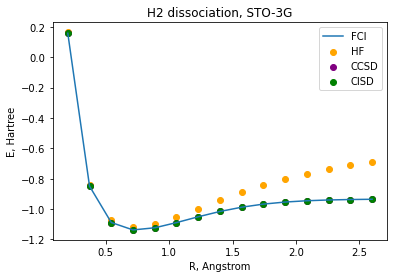

In [56]:
#Plot H2 PESs

plt.title('H2 dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.scatter(bond_lengths, CISD_PES, label='CISD', color='green')

plt.legend()
#plt.savefig('h2_dissociation')

In [ ]:
#Plot H2 TOE

plt.title('H2 time to execute, STO-3G')
plt.ylabel('T, seconds')

times = [timefci_h2, timehf_h2, timeccsd_h2, timecisd_h2]
plt.hist(timefci_h2, label='FCI')
plt.hist(timehf_h2, label='HF', color='orange')
plt.hist(timeccsd_h2, label='CCSD', color='purple')
plt.hist(timecisd_h2, label='CISD', color='green')
plt.hist(timecisd_h2, density=False, bins=30)  # density=False would make counts
plt.legend()

<img src="figs/testimage.png">

## H<sub>2</sub>O symmetric O-H dissociation

In [67]:
bond_lengths = np.linspace(0.1,2.5,15)

In [68]:
#Run FCI
start = timer()
FCI_PES = obtain_PES('h2o', bond_lengths, basis, method='fci')
end = timer()

E = -20.553771141334764 Eh
E = -64.564818707552 Eh
E = -72.14984536015112 Eh
E = -74.24382722957368 Eh
E = -74.85934058833972 Eh
E = -75.01055655633581 Eh
E = -75.00356512166908 Eh
E = -74.94630669715279 Eh
E = -74.88182451078211 Eh
E = -74.82681470609228 Eh
E = -74.78732953658485 Eh
E = -74.76322402929027 Eh
E = -74.75030651311205 Eh
E = -74.74382125661842 Eh
E = -74.74059050316203 Eh


In [69]:
timefci_h2o = end - start
timefci_h2o

11.299829350999971

In [70]:
#Run HF
start = timer()
HF_PES = obtain_PES('h2o', bond_lengths, basis,  method='hf')
end = timer()

E = -20.552132284766426 Eh
E = -64.55967663960871 Eh
E = -72.13907969071613 Eh
E = -74.22459875378345 Eh
E = -74.82823817948282 Eh
E = -74.96165147934957 Eh
E = -74.92817508740464 Eh
E = -74.83391237791122 Eh
E = -74.72139237065929 Eh
E = -74.60781024500737 Eh
E = -74.50149773997009 Eh
E = -74.40772786804456 Eh
E = -74.32694041215728 Eh
E = -74.26084947441159 Eh
E = -74.2722265299641 Eh


In [71]:
timehf_h2o = end - start
timehf_h2o

17.573146169999745

In [72]:
#Run CCSD
start = timer()
CCSD_PES = obtain_PES('h2o', bond_lengths, basis,  method='ccsd')
end = timer()

E = -20.553770535981744 Eh
E = -64.5648146605731 Eh
E = -72.14982918998028 Eh
E = -74.24379590307741 Eh
E = -74.85927788559391 Eh
E = -75.01043286702772 Eh
E = -75.00330155818898 Eh
E = -74.94573255480928 Eh
E = -74.88088098064634 Eh
E = -74.82649324674901 Eh
E = -74.79153267626143 Eh
E = -74.77426949942473 Eh
E = -74.77830089113601 Eh
E = -74.78204801890462 Eh
E = -74.64213142546797 Eh


In [73]:
timeccsd_h2o = end - start
timeccsd_h2o

21.070637611000166

In [64]:
start = timer()
CISD_PES = obtain_PES('h2o', bond_lengths, basis,  method='cisd')
end = timer()

E = -20.553770812485425 Eh
E = -63.30953409197321 Eh
E = -71.47469378937646 Eh
E = -73.93026473650659 Eh
E = -74.7324167385128 Eh
E = -74.97666441770652 Eh
E = -75.01661765428426 Eh
E = -74.97922232797262 Eh
E = -74.91676926209904 Eh
E = -74.8508576498539 Eh
E = -74.79020409617537 Eh
E = -74.73922945881797 Eh
E = -74.71240657645414 Eh
E = -74.7237507342515 Eh
E = -74.7299489738088 Eh


In [65]:
timecisd_h2o = end - start
timecisd_h2o

12.439671166000153

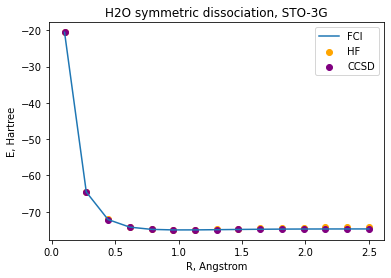

In [75]:
#Plot H2O PESs

plt.title('H2O symmetric dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
#plt.scatter(bond_lengths, CISD_PES, label='CISD', color='green')

plt.legend()
#plt.savefig('h2o_dissociation.png')

## LiH

In [76]:
bond_lengths = np.linspace(0.3,2.6,15)

In [77]:
#Run FCI
start = timer()
FCI_PES = obtain_PES('lih', bond_lengths, basis, method='fci')
end = timer()

E = -5.881786886158692 Eh
E = -6.925282864529373 Eh
E = -7.379446982378825 Eh
E = -7.62642979567252 Eh
E = -7.761162034873516 Eh
E = -7.832334925500511 Eh
E = -7.867260599272539 Eh
E = -7.88098231460632 Eh
E = -7.882064186803914 Eh
E = -7.875711259224834 Eh
E = -7.865256408324724 Eh
E = -7.852909020638875 Eh
E = -7.840175831223494 Eh
E = -7.828104085211536 Eh
E = -7.817399927375689 Eh


In [78]:
timefci_lhi = end - start
timefci_lhi

8.03241652099996

In [79]:
start = timer()
HF_PES = obtain_PES('lih', bond_lengths, basis,  method='hf')
end = timer()

E = -5.842510738072491 Eh
E = -6.901520788087373 Eh
E = -7.359956234153662 Eh
E = -7.608056736309235 Eh
E = -7.743922800250033 Eh
E = -7.8156426139500725 Eh
E = -7.850229846807039 Eh
E = -7.86265126612485 Eh
E = -7.861452286097636 Eh
E = -7.851802661473536 Eh
E = -7.836964866202663 Eh
E = -7.81904391162751 Eh
E = -7.799420629286217 Eh
E = -7.779025947289931 Eh
E = -7.758519166159335 Eh


In [80]:
timehf_lhi = end - start
timehf_lhi

14.303375603999939

In [81]:
#Run CCSD
star = timer()
CCSD_PES = obtain_PES('lih', bond_lengths, basis,  method='ccsd')
end = timer()

E = -5.881617113461478 Eh
E = -6.925180051154551 Eh
E = -7.37942982971722 Eh
E = -7.626422894142749 Eh
E = -7.76115564846209 Eh
E = -7.832327988681904 Eh
E = -7.867252454615895 Eh
E = -7.880972191526 Eh
E = -7.882051700398201 Eh
E = -7.875696442618595 Eh
E = -7.8652389662116615 Eh
E = -7.852887980617965 Eh
E = -7.840149460768691 Eh
E = -7.82806990232103 Eh
E = -7.81735501347461 Eh


In [82]:
timeccsd_lhi = end - start
timeccsd_lhi

38.80341409599987

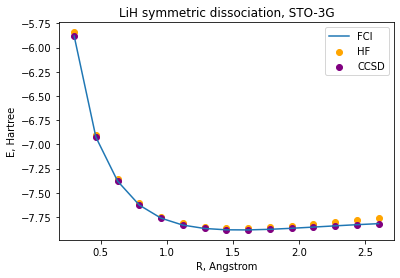

In [84]:
#Plot LiH PESs

plt.title('LiH symmetric dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()
#plt.savefig('lih_dissociation')

## H<sub>4</sub>

In [8]:
bond_lengths = np.linspace(0.3,2.4,15)

In [17]:
#Run FCI
start = timer()
FCI_PES = obtain_PES('h4', bond_lengths[:14], basis, method='fci')
end = timer()

E = 2.4456387329653175 Eh
E = -0.16672878751600972 Eh
E = -1.191865903474187 Eh
E = -1.6413493630599731 Eh
E = -1.8467405732017914 Eh
E = -1.9365084915912725 Eh
E = -1.967549880339193 Eh
E = -1.968499098357047 Eh
E = -1.9551250115194287 Eh
E = -1.9365597434430886 Eh
E = -1.9180537900460375 Eh
E = -1.9022947738864633 Eh
E = -1.8902054406231423 Eh
E = -1.8816138081427218 Eh


In [10]:
timefci_h4 = end - start
timefci_h4

10.261523454000098

In [18]:
#Run HF
start = timer()
HF_PES = obtain_PES('h4', bond_lengths[:14], basis,  method='hf')
end = timer()

E = 2.51067460506912 Eh
E = -0.08517721151966073 Eh
E = -1.0916132353952208 Eh
E = -1.521594320893344 Eh
E = -1.7069364267791536 Eh
E = -1.7751902345257937 Eh
E = -1.7824403658029082 Eh
E = -1.7568919615120455 Eh
E = -1.7141497935729015 Eh
E = -1.6634040511154629 Eh
E = -1.610268141651468 Eh
E = -1.5582105017014232 Eh
E = -1.5093189361387194 Eh
E = -1.4647366812567202 Eh


In [12]:
timehf_h4 = end - start
timehf_h4

20.504835479000008

In [19]:
#Run CCSD
start = timer()
CCSD_PES = obtain_PES('h4', bond_lengths[:14], basis,  method='ccsd')
end = timer()

E = 2.4474307442445298 Eh
E = -0.16733816026056259 Eh
E = -1.1930174395018955 Eh
E = -1.6430958139685676 Eh
E = -1.8494504027922363 Eh
E = -1.9407101313240125 Eh
E = -1.9739067528033327 Eh
E = -1.9778018619699946 Eh
E = -1.967978956927352 Eh
E = -1.9528824030101832 Eh
E = -1.9368653512424514 Eh
E = -1.9220051521703139 Eh
E = -1.909170076984367 Eh
E = -1.8985923318608928 Eh


In [14]:
timeccsd_h4 = end - start
timeccsd_h4

17.70263412899999

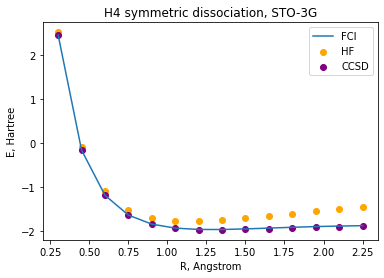

In [21]:
#Plot H4 PESs

plt.title('H4 symmetric dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths[:14], FCI_PES, label='FCI')
plt.scatter(bond_lengths[:14], HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths[:14], CCSD_PES, label='CCSD', color='purple')
plt.legend()
#plt.savefig('h4_dissociation')